In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기 및 개요 파악하기
basketball_df = pd.read_csv("Dataset/basketball_stat.csv")

print("data shape:", basketball_df.shape)
basketball_df.info()
basketball_df.describe()

data shape: (100, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


,3P,2P,TRB,AST,STL,BLK
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000
max,3.40000,9.700000,14.100000,5.900000,1.600000,3.00000


In [15]:
# 데이터 전처리
basketball_sorted = basketball_df.sort_values(by=['Pos'], ascending=False) # 'Pos' 기준으로 내림차순으로 정렬

basketball_2P_new = basketball_sorted['2P'] * (-1)
basketball_2P_new.name = '2P_new'

basketball_sorted['Pos_new'] = np.where(basketball_sorted['Pos'] != 'SG', 0, 1)

basketball_sorted = pd.concat([basketball_sorted, basketball_2P_new],axis=1)
basketball_sorted

,Player,Pos,3P,2P,TRB,AST,STL,BLK,Pos_new,2P_new
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1,1,-0.6
70,E'Twaun Moore,SG,1.1,2.8,2.1,2.2,0.7,0.4,1,-2.8
39,Tim Hardaway,SG,1.9,3.4,2.8,2.3,0.7,0.2,1,-3.4
41,Gary Harris,SG,1.9,3.7,3.1,2.9,1.2,0.1,1,-3.7
42,Joe Harris,SG,1.6,1.3,2.8,1.0,0.6,0.2,1,-1.3
...,...,...,...,...,...,...,...,...,...,...
62,Robin Lopez,C,0.0,4.7,6.4,1.0,0.2,1.4,0,-4.7
63,Ian Mahinmi,C,0.0,2.1,4.8,0.6,1.1,0.8,0,-2.1
66,JaVale McGee,C,0.0,2.7,3.2,0.2,0.2,0.9,0,-2.7
35,Marcin Gortat,C,0.0,4.8,10.4,1.5,0.5,0.7,0,-4.8


In [ ]:
# Position별 Boolean 인덱싱으로 numpy array 생성
SG = np.array(basketball_sorted[basketball_sorted["Pos"] == 'SG']) # Shooting Guard 인덱싱
C = np.array(basketball_sorted[basketball_sorted["Pos"] == 'C']) # Center 인덱싱

In [ ]:
# Position별 3점, 2점 분포
sns.scatterplot(x='Pos', y='3P', data=basketball_sorted)
sns.scatterplot(x='Pos', y='2P', data=basketball_sorted)
plt.legend(['2P', '3P']) # 범례 표시
plt.ylim((0, 3)) # y축 구간을 0 ~ 3으로 scaling
plt.title("Pos - 3P & 2P")
plt.show()

In [ ]:
# Position별 3점, 2점 분포 / 3점 - y축(+), 2점 - y축(-)
sns.scatterplot(x='Pos', y='3P', data=basketball_sorted)
sns.scatterplot(x='Pos', y='2P_new', data=basketball_sorted)
plt.legend(['2P', '3P']) # 범례 표시
plt.ylim((-2, 3)) # y축 구간을 0 ~ 3으로 scaling
plt.title("Pos - 3P & 2P")
plt.show()

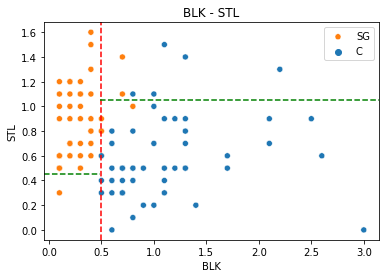

In [35]:
# BLK - STL Plot by SG - C
sns.scatterplot(x='BLK', y='STL', data=basketball_sorted, hue="Pos_new")
plt.xlabel('BLK')
plt.ylabel('STL')
plt.legend(['SG', 'C'])
plt.axvline(x=0.5, color='r', linestyle='--')
plt.axhline(y=1.05, xmin=0.5/3.0, xmax=3.0, color='g', linestyle='--')
plt.axhline(y=0.45, xmin=0, xmax=0.5/3.0, color='g', linestyle='--')
plt.title('BLK - STL')
plt.show()
